In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

# 7.1 Procedimiento de análisis típico

Antes, el análisis estadístico de los datos generalmente se restringía a las pruebas de hipótesis: 
- Formulas una hipótesis.
- Recopilas tus datos.
- Aceptas o rechazas la hipótesis. 

Hoy, es un proceso altamente interactivo: 
- Miras los datos y generas modelos que pueden explicar tus datos. 
- Determinas los parámetros que mejor se ajustan a estos modelos y verifica estos modelos, generalmente observando los residuos. 
- Si no está satisfecho con los resultados, modifica el modelo para mejorar la correspondencia entre modelos y datos; cuando está satisfecho, calcula los IC para los parámetros de su modelo y forma su interpretación en función de estos valores. 

Pasos:
- Inspeccione visualmente los datos.
- Encuentre muestras extremas y verifíquelas cuidadosamente
- Determinar el tipo de datos de los valores. 
- Si los datos son continuos, comprobar si se distribuyen normalmente o no. 
- Seleccione y aplique la prueba adecuada, o comience con el análisis de datos basado en modelos.

## 7.1.1 Selección de datos y valores atípicos

El primer paso en el análisis de datos es la inspección visual de los datos. 

Si los datos se muestran correctamente, las tendencias que caracterizan los datos pueden ser claramente visibles. 

Es recomendable verificar
- Si el primer y el último valor de los datos se han leído correctamente.
- Si faltan datos. 
- Si hay valores atípicos. 

No existe una definición única para los valores atípicos.

Para muestras distribuidas normalmente, se definen como datos que se encuentran más de $1.5*RIC$ (rango intercuartílico).

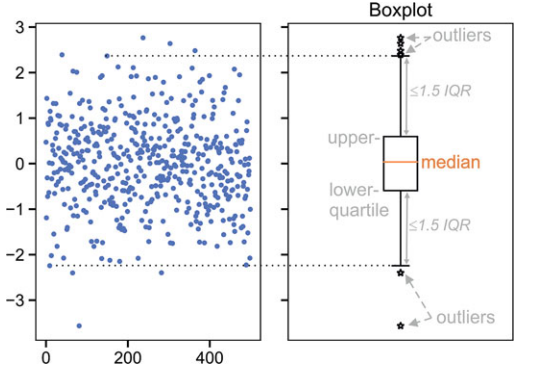

In [2]:
Image(filename='Imagenes/4.13.png')

más allá del cuartil superior e inferior, o más de 2 desviaciones estándar de la media muestral. 

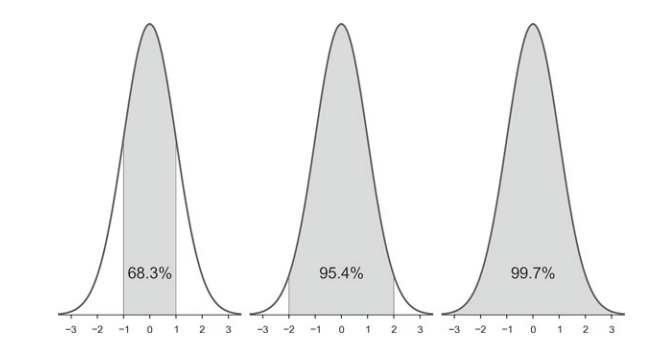

In [3]:
Image(filename='Imagenes/6.12.png')

Grupos de valores atípicos: 
- Causados por errores en la grabación
    - Deben ser excluidos. 
- Puntos de datos muy importantes y valiosos
    - Deben incluirse en el análisis de datos.  

Para decidir cuál es, debe verificar los datos sin procesar subyacentes (por saturación o valores de datos no válidos) y los protocolos de sus experimentos (por errores que pueden haber ocurrido durante la grabación). 

Si se detecta un problema subyacente, entonces, y solo entonces, se pueden eliminar los valores atípicos del análisis. En cualquier otro caso, ¡los datos deben conservarse!

## 7.1.2 Comprobación de normalidad

Las pruebas de hipótesis estadísticas se pueden agrupar en pruebas:
- Paramétricas 
    - Asumen que los datos pueden ser bien descritos por una distribución que está definida por uno o más parámetros, en la mayoría de los casos por una distribución normal. 
    - Para el conjunto de datos dado, se determinan los parámetros de mejor ajuste para esta distribución, junto con sus intervalos de confianza, y se interpretan
    - Este enfoque solo funciona si el conjunto de datos dado está bien aproximado por la distribución elegida.

- No paramétricas 
    - Son menos sensibles.
    - No dependen de que los datos sigan una distribución específica.

### a) Gráficos de probabilidad

En estadística se encuentran disponibles diferentes herramientas para la evaluación visual de las distribuciones. Existen diferentes métodos gráficos para comparar dos distribuciones de probabilidad trazando sus cuantiles, o parámetros estrechamente relacionados, entre sí:

- QQ-Plots 
    - La "Q" en QQ-plot significa cuantil. 
    - Los cuantiles de un conjunto de datos determinado se representan frente a los cuantiles de una distribución de referencia, normalmente la distribución normal estándar. 
- PP-Plots
    - Traza la CDF (función de distribución acumulativa) de un conjunto de datos dado contra la CDF de una distribución de referencia. 
- Gráficos de probabilidad 
    - Representar gráficamente los valores ordenados de un conjunto de datos dado frente a los cuantiles de una distribución de referencia.

Los resultados son similares: 
- Si las dos distribuciones que se comparan son similares, los puntos estarán aproximadamente en la línea y = x. 
- Si las distribuciones están linealmente relacionadas, los puntos estarán aproximadamente en una línea, pero no necesariamente en la línea y = x.

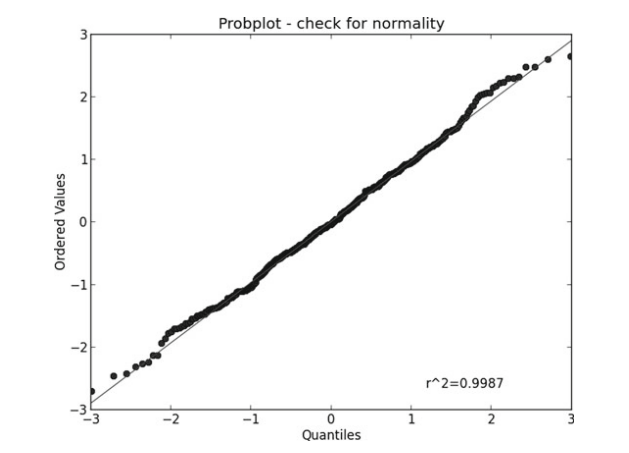

In [4]:
Image(filename='Imagenes/7.1.png')

En Python, se puede generar un gráfico de probabilidad con el comando

stats.probplot(data, plot=plt)

y qq-plots con el comando pingouin

pg.qqplot(datos, plot=plt)

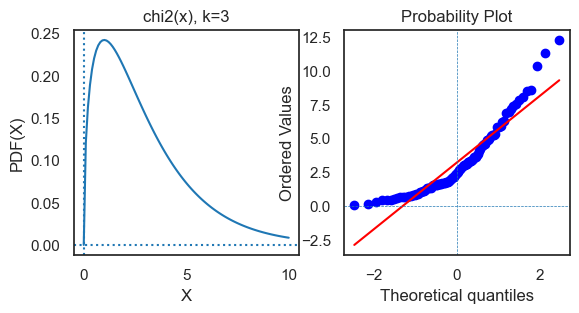

In [2]:
"""Generar un diagrama de probabilidad para una distribución chi2 de datos de muestra"""

# Definir la distribución sesgada
chi2 = stats.chi2(3)

# Generar los datos
x = np.linspace(0,10, 100)
y = chi2.pdf(x)
np.random.seed(123)
numData = 100
data = chi2.rvs(numData)

# Organizar graficos
sns.set_context('notebook')
sns.set_style('white')
#setFonts(11)
fig, axs = plt.subplots(1,2)

# Grafico la distribución
axs[0].plot(x,y)
axs[0].set_xlabel('X')
axs[0].set_ylabel('PDF(X)')
axs[0].set_title('chi2(x), k=3')
axs[0].axhline(ls='dotted')
axs[0].axvline(ls='dotted')
sns.set_style('white')

x0, x1 = axs[0].get_xlim()
y0, y1 = axs[0].get_ylim()
axs[0].set_aspect((x1-x0)/(y1-y0))


# Plot probplot
# plt.axes(axs[1])
# pg.qqplot(data, ax=axs[1])
stats.probplot(data, plot=plt)

x0, x1 = axs[1].get_xlim()
y0, y1 = axs[1].get_ylim()
axs[1].axhline(0, lw=0.5, ls='--')
axs[1].axvline(0, lw=0.5, ls='--')
axs[1].set_aspect((x1-x0)/(y1-y0))

plt.show()

In [3]:
data

array([ 0.68608402,  5.21901228,  1.29331544,  8.02787772,  0.03694635,
        1.52400891,  1.15257151,  2.13466018,  1.4996341 ,  1.51518162,
        5.24383717,  3.27096781,  0.83935097,  5.90661764,  4.89265213,
        0.40779721,  1.82354778,  4.96505079,  1.97797794,  0.90237944,
        3.00123274,  1.58666542,  3.80535428, 12.25606169,  3.34381783,
        5.15055769, 11.27667567,  8.49079828,  0.99906542,  4.83484577,
        8.5480337 ,  1.03050396,  4.50607786,  6.92945076,  4.54765818,
        0.58398838,  2.79143923,  5.8521163 ,  0.67508905,  1.56593173,
        2.07153   ,  6.23100447,  1.13914826,  1.71728791,  0.68582443,
       10.36953371,  2.70689922,  5.80439958,  0.52672772,  1.68187034,
        5.34477509,  3.25264085,  1.60632979,  4.23499564,  2.2805384 ,
        2.40786861,  3.38028985,  0.2997193 ,  1.07819126,  3.59229209,
        0.44803795,  1.68627745,  1.78683424,  1.33231756,  7.81926378,
        1.79689501,  4.56488626,  3.58794796,  0.77394313,  0.67

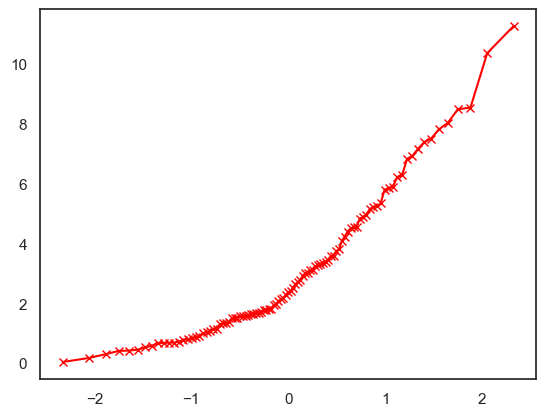

In [4]:
# Para tener una idea de cómo funciona probplot, calcule los cuantiles directamente. 
# en "probplot", se usa la estimación de Filliben, que cambia los valores levemente. 

data.sort() 
marca_y = data[:-1] 
nd = stats.norm() 
marca_x = nd.ppf(np.arange(1,len(data))/numData) 

plt.plot(marca_x, marca_y, 'rx-')

plt.show()

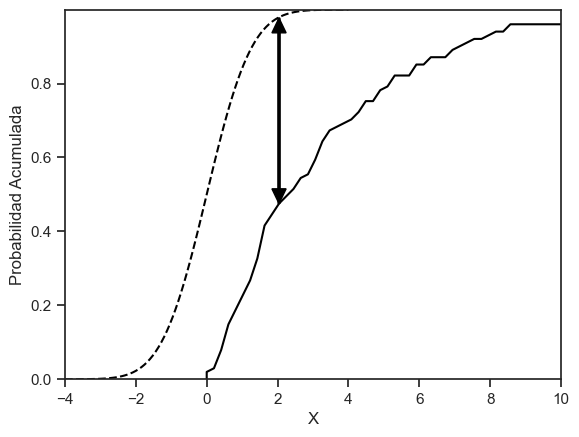

In [5]:
"""Muestre el principio de la prueba de Kolmogorov-Smirnov."""

# CDF de datos normalmente distribuidos
nd = stats.norm()
nd_x = np.linspace(-4, 4, 101)
nd_y = nd.cdf(nd_x)

#data = chi2.rvs(numData)

# CDF empírico de los datos de muestra, que oscilan entre 0 y 10 aproximadamente
numPts = 50
lowerLim = 0
upperLim = 10
ecdf_x = np.linspace(lowerLim, upperLim, numPts)
ecdf_y = stats.cumfreq(data, numPts, (lowerLim, upperLim))[0]/len(nd_x)

# Añadir punto cero a mano
ecdf_x = np.hstack((0., ecdf_x))
ecdf_y = np.hstack((0., ecdf_y))

# Grafico los datos
sns.set_style('ticks')
sns.set_context('notebook')
#setFonts(18)

plt.plot(nd_x, nd_y, 'k--')
plt.plot(ecdf_x, ecdf_y, color='k')
plt.xlabel('X')
plt.ylabel('Probabilidad Acumulada')
plt.gca().margins(0, 0)

# Para la flecha, busca el inicio
ecdf_startIndex = np.min(np.where(ecdf_x >= 2))
arrowStart = np.array([ecdf_x[ecdf_startIndex], ecdf_y[ecdf_startIndex]])

nd_startIndex = np.min(np.where(nd_x >= 2))
arrowEnd = np.array([nd_x[nd_startIndex], nd_y[nd_startIndex]])
arrowDelta = arrowEnd - arrowStart

plt.arrow(arrowStart[0], arrowStart[1], 0, arrowDelta[1],
          width=0.05, length_includes_head=True, head_length=0.04,
          head_width=0.4, color='k')

plt.arrow(arrowStart[0], arrowStart[1]+arrowDelta[1], 0, -arrowDelta[1],
          width=0.05, length_includes_head=True, head_length=0.04,
          head_width=0.4, color='k')

plt.show()

Aquí tenemos 100 puntos de datos aleatorios de una distribución chi2, que es claramente asimétrica. 

El valor x del primer punto de datos es (aproximadamente) el cuantil 1/100 de una distribución normal estándar

(stats.norm().ppf(0.01)), 

que corresponde a -2.33 (El valor exacto está ligeramente desplazado, debido a una pequeña corrección, llamada “estimación de Filliben”). 

El valor y es el valor más pequeño de nuestro conjunto de datos. 

El segundo valor de x corresponde aproximadamente a 

stats.norm().ppf(0.02), 

y el segundo valor de y es el segundo valor más bajo del conjunto de datos, etc.

### b) Pruebas de Normalidad

Desafíos en las pruebas de normalidad: 
- A veces, solo unas pocas muestras pueden estar disponibles
- Otras veces uno puede tener muchos datos, pero algunos valores extremadamente atípicos. 

Hay diferentes pruebas de normalidad. 

Categorías:

1. Basadas en la comparación ("mejor ajuste") con una distribución dada.
    - A menudo especificada en términos de su CDF. 
    - Ej: prueba de 
        - Kolmogorov-Smirnov
        - Lilliefors
        - Anderson-Darling
        - Shapiro-Wilk 
        - Shapiro-Francia
        - Criterio de Cramer-von Mises

2. Basadas en estadísticas descriptivas de la muestra. 
    - Ej: prueba de
        - Asimetría
        - Curtosis
        - Ómnibus de D'Agostino-Pearson 
        - Jarque-Bera 

Ej: la prueba de Lilliefors, que se basa en la prueba de Kolmogorov-Smirnov.

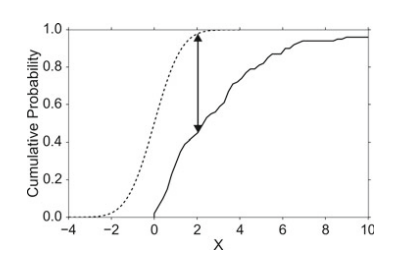

In [14]:
Image(filename='Imagenes/7.3.png')

Cuantifica una distancia entre la función de distribución empírica de la muestra y la función de distribución acumulada de la distribución de referencia, o entre la función de distribución empírica Funciones de distribución de 2 muestras. 

La prueba original de Kolmogorov-Smirnov no debe utilizarse si el número de muestras es ≤ 300.

La prueba W de Shapiro-Wilk
- Depende de la matriz de covarianza entre los estadísticos de orden de las observaciones.
- Se puede utilizar con ≤ 50 muestras. 

pingouin pg.normality(x): 
- usa por defecto la prueba de Shapiro-Wilk. 
- method=normaltest: cambia al comando scipy  

stats.normaltest(x) 

con la prueba omnibus de D'Agostino-Pearson. 

Esa prueba combina una prueba de asimetría y curtosis para producir una única estadística "ómnibus" global. 

Comprobación gráfica y cuantitativa, si una determinada distribución es normal. 
- Para números de muestra pequeños (<50), debe usar la prueba de Shapiro-Wilk o la "prueba normal" 
- Para números de muestra intermedios, la prueba de Lilliefors es buena ya que la prueba original de Kolmogorov-Smirnov 
  no es confiable cuando la media y la desviación estándar no se conocen. 
- La prueba de Kolmogorov-Smirnov(Kolmogorov-Smirnov) solo debe usarse para grandes números de muestra (>300)

In [6]:
from statsmodels.stats.diagnostic import lilliefors

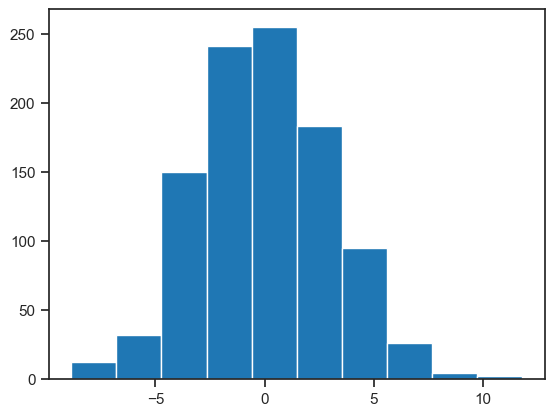

In [11]:
"""Chequeo si la distribución es normal."""

# Conjunto de parámetros
numData = 1000
myMean = 0
mySD = 3

# Para obtener valores reproducibles, proporciono un valor semilla
np.random.seed(12345)

# Generar y mostrar datos aleatorios
data = stats.norm.rvs(myMean, mySD, size=numData)
fewData = data[:100]

plt.hist(data)

plt.show()

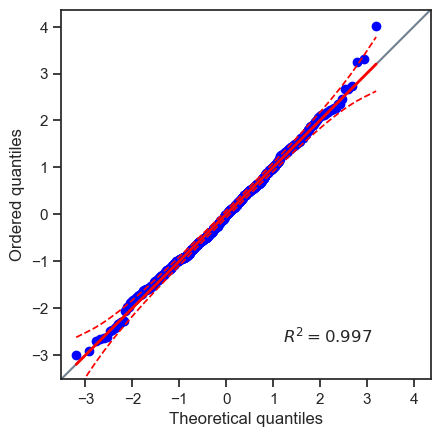

In [12]:
# Prueba gráfica: si los datos se encuentran en una línea, 
# tienen una distribución bastante normal

pg.qqplot(data)

plt.show()

In [13]:
# Con pandas Series, es simple imprimir pares de nombre/valor sin ningún formato adicional

pVals = pd.Series(np.float64)
pFewVals = pd.Series(np.float64)

In [15]:
# scipy normaltest está basada en el test de D-Agostino and Pearsons que
# combina sesgo y curtosis para producir una prueba ómnibus de normalidad.

_, pVals['Omnibus'] = stats.normaltest(data)
_, pFewVals['Omnibus'] = stats.normaltest(fewData)

In [14]:
stats.normaltest(data)

NormaltestResult(statistic=4.204424647134577, pvalue=0.12218581446379734)

In [16]:
# Test de Shapiro-Wilk 

_, pVals['Shapiro-Wilk'] = stats.shapiro(data)
_, pFewVals['Shapiro-Wilk'] = stats.shapiro(fewData)

In [17]:
# Test de Lilliefors

_, pVals['Lilliefors'] = lilliefors(data)
_, pFewVals['Lilliefors'] = lilliefors(fewData)

In [18]:
# Test de Kolmogorov-Smirnov 

_, pVals['Kolmogorov-Smirnov'] = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
_, pFewVals['Kolmogorov-Smirnov'] = stats.kstest((fewData-np.mean(fewData))/np.std(fewData,ddof=1), 'norm')

In [19]:
print(f'p-values para todos {len(data)} los puntos de datos: ----------------')
print(pVals)
print('p-values para los primeros 100 puntos de datos: ----------------')
print(pFewVals)

p-values para todos 1000 los puntos de datos: ----------------
0                     <class 'numpy.float64'>
Omnibus                              0.122186
Shapiro-Wilk                          0.08735
Lilliefors                            0.12526
Kolmogorov-Smirnov                   0.471447
dtype: object
p-values para los primeros 100 puntos de datos: ----------------
0                     <class 'numpy.float64'>
Omnibus                              0.754142
Shapiro-Wilk                         0.685816
Lilliefors                           0.149172
Kolmogorov-Smirnov                    0.54879
dtype: object


In [20]:
if pVals['Omnibus'] > 0.05:
    print('Los datos están normalmente distribuidos')
else: 
    print('Los datos no están normalmente distribuidos')

Los datos están normalmente distribuidos


que verifica la normalidad en 1000 variaciones aleatorias de una distribución normal. 

Si bien para el conjunto completo de datos, todas las pruebas indican correctamente que la distribución subyacente es normal, los efectos de los valores extremos dependen en gran medida del tipo de prueba si solo se incluyen las primeras 100 variables aleatorias. 

Tenga en cuenta que un valor p de 1 indica una alta probabilidad de que la hipótesis nula (que los datos se distribuyen normalmente) sea verdadera.

## 7.1.3 Transformación

Si los datos se desvían significativamente de una distribución normal, a veces es posible hacer que la distribución sea aproximadamente normal transformando los datos. 

Ej: los datos a menudo tienen valores que solo pueden ser positivos (el tamaño de las personas) y que tienen una cola positiva larga: estos datos a menudo se pueden normalizar aplicando una transformación logarítmica. 

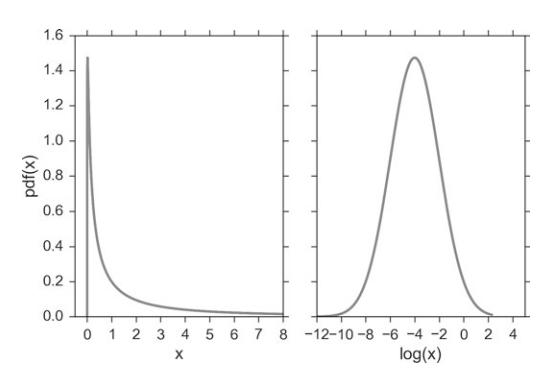

In [22]:
Image(filename = 'Imagenes/6.21.png')

# 7.2 Pruebas de hipótesis y análisis de potencia

## 7.2.1 Un ejemplo

Suponga que está produciendo bolsas pequeñas de galletas de chocolate. El contrato con el supermercado dice que sus bolsas deben contener 110 g de galletas por bolsa. Una inspección de 10 bolsas produce los siguientes pesos:

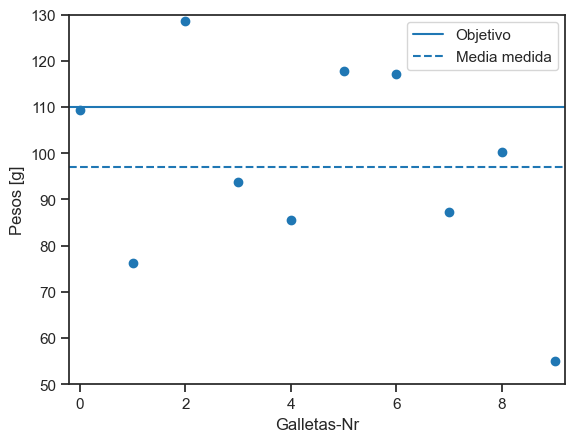

In [24]:
sns.set_context('notebook')
sns.set_style('ticks')
#setFonts()

# Genero los datos
np.random.seed(1234)
nd = stats.norm(100, 20)
#pesos = nd.rvs(10)
pesos = np.array([109.4, 76.2, 128.7, 93.7, 85.6,
                  117.7, 117.2, 87.3, 100.3, 55.1])

# Grafico
plt.plot(pesos, 'o')
plt.axhline(110, ls='-', label='Objetivo')
plt.axhline(np.mean(pesos), ls='--', label='Media medida')

plt.xlim(-0.2, 9.2)
plt.ylim(50, 130)
plt.xlabel('Galletas-Nr')
plt.ylabel('Pesos [g]')
plt.legend()

plt.show()

In [22]:
pesos = np.array([109.4, 76.2, 128.7, 93.7, 85.6,
                  117.7, 117.2, 87.3, 100.3, 55.1])

In [23]:
print(f'El peso medio de galletas por bolsa es {round(pesos.mean(),1)}')

El peso medio de galletas por bolsa es 97.1


¿Es el peso medio de galletas por bolsa (97.1) significativamente diferente de 110? 

Una prueba de normalidad

In [25]:
# Omnibus

stats.normaltest(pesos)

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.47671379397957303, pvalue=0.7879214341188467)

In [26]:
if pVals['Omnibus'] > 0.05:
    print('Los datos están normalmente distribuidos')
else: 
    print('Los datos no están normalmente distribuidos')

Los datos están normalmente distribuidos


indica que los datos probablemente se toman de una distribución normal. 

Dado que no conocemos la varianza poblacional de los pesos, tenemos que hacer nuestra mejor suposición, la varianza muestral 

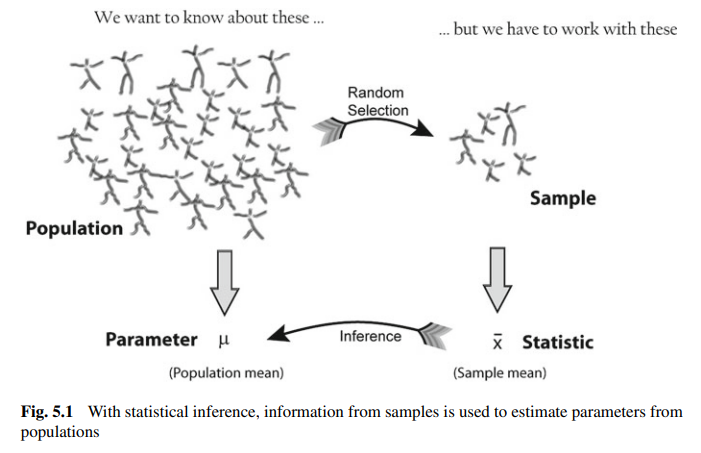

In [23]:
Image(filename = 'Imagenes/5.1.png')

Sabemos que la diferencia normalizada entre la muestra y la media poblacional, el estadístico t, sigue la distribución t 

$ t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}} = \frac{\bar{x}-\mu}{SE} $

La diferencia entre la media de nuestra muestra y el valor con el que queremos compararla, 

np.mean(weights)- 110,

es –12,9. 

Normalizado por el error estándar de la muestra, esto da un valor de t = −1.84. 

Dado que la distribución t es una curva conocida que depende únicamente del número de muestras, podemos calcular la probabilidad de que obtengamos un estadístico t de |t| > 1,84:

In [27]:
t_val = (110 - np.mean(pesos)) / stats.sem(pesos)
t_val

1.836024999781543

In [28]:
td = stats.t(len(pesos - 1))
td

Se multiplica por 2, ya que tenemos que combinar la probabilidad de t < −1.84 y t > 1.84. 

In [29]:
p = 2 * td.sf(t_val)
p

0.0962226855357113

In [30]:
if p < .05:
    print('Es significativamente diferente de 110.')
else:
    print('No es significativamente diferente de 110.')

No es significativamente diferente de 110.


Dados los datos de nuestra muestra, podemos afirmar que la probabilidad de que la media de la población sea 110 es del 9,95 %. 

Pero dado que una diferencia estadística solo se da por convención si la probabilidad es menor al 5%, concluimos que el valor observado de 97.1 no es significativamente diferente de 110, y sus galletas pueden seguir vendiéndose en el supermercado.

## 7.2.2 Generalización y Aplicaciones

### a) Pasos del análisis

Procedimiento general para las pruebas de hipótesis: 
- Se extrae una muestra aleatoria de una población. 
    - Ej: nuestros pesos. 
- Se formula una hipótesis nula. 
    - "Hay una diferencia nula entre el peso medio de las galletas y el valor de 110." 
- Se calcula una estadística de prueba, de la cual conocemos la distribución de probabilidad. 
    - La media muestral normalizada, ya que sabemos que el valor medio de las muestras de una distribución normal sigue la distribución t. 
- Comparar el valor observado del estadístico 
    - El valor t obtenido, con la distribución correspondiente (t), permite encontrar la probabilidad de que “se encuentre por casualidad un valor tan extremo o más extremo que el observado”. 
    - Este es el llamado valor p. 
- Si el valor p es
    - p < 0,05:
        - Rechazamos la hipótesis nula
        - Hablamos de una diferencia estadísticamente significativa. 
    - p < 0,001:
        - Hablamos de una diferencia altamente significativo. 
    - La región crítica de una prueba de hipótesis es el conjunto de todos los resultados que hacen que se rechace la hipótesis nula. 

El valor $p$ indica qué tan probable es obtener un valor tan extremo o más extremo solo por casualidad, si la hipótesis nula es verdadera. 

El valor con el que se compara el valor $p$ es el nivel de significación ($\alpha$).

$\alpha$ es una elección del usuario y normalmente se establece en 0,05. 

Esta forma de proceder para probar una hipótesis se denomina inferencia estadística. 

$p$ solo indica la probabilidad de obtener un cierto valor para el estadístico de prueba si la hipótesis nula es verdadera, ¡nada más! 

### b) Ejemplos Adicionales

Ejemplo 1: Comparemos el peso de dos grupos de sujetos. 

La hipótesis nula es que existe una diferencia nula en el peso entre los dos grupos. 

Si una comparación estadística del peso produce un valor p de 0.03, esto significa que la probabilidad de que la hipótesis nula sea correcta es de 0.03 o 3%. Como esta probabilidad es bastante baja, decimos que “hay una diferencia significativa entre el peso de los dos grupos”. 

Ejemplo 2: Si queremos comprobar el supuesto de que el valor medio de un grupo es de 75 kg, entonces la hipótesis nula correspondiente sería: “Suponemos que existe una diferencia nula entre el valor medio de nuestra población y el valor de 75”. 

Ejemplo 3: prueba de normalidad.

Si verificamos si una muestra de datos se distribuye normalmente, la hipótesis nula es que "no hay diferencia entre mis datos y los datos distribuidos normalmente": aquí un valor p grande indica que los datos son de hecho normalmente distribuido!

## 7.2.3 La interpretación del valor P

La investigación se divide en
- Exploratoria
- Confirmatoria

Se recomienda utilizar un “valor p calibrado” para estimar la probabilidad de cometer un error al rechazar la hipótesis nula, cuando los datos producen un valor p:

$ \alpha(p) = \frac{1}{1+\frac{1}{-e ~ p ~ ln(p)}} $

Ej: p = 0,05 conduce a $\alpha$ = 0,29 y p = 0,01 a $\alpha$ = 0,11. 

Un valor de p < 0,05 para la hipótesis nula debe interpretarse de la siguiente manera: 

In [31]:
def alpha(p):
    alpha = 1 / (1+(1/(-np.e*p*np.log(p))))
    return round(alpha,2)

alpha(.05)

0.29

In [32]:
alpha(.01)

0.11

Si la hipótesis nula es verdadera, la probabilidad de encontrar un estadístico de prueba tan extremo o más extremo que el observado es inferior al 5%. 

¡Esto no es lo mismo que decir que la hipótesis nula es falsa, y menos aún, que una hipótesis alternativa es verdadera!

## 7.2.4 Tipos de Errores

### a) Errores Tipo I

Son errores en los que el resultado es significativo a pesar de que la hipótesis nula es cierta. 

La probabilidad de un error de tipo I ($\alpha$) se establece antes del inicio del análisis de datos. 

En el control de calidad, se denomina riesgo del productor, porque se rechaza un lote de artículos a pesar de que en realidad cumplen con los requisitos acordados. 

Ej: Un diagnóstico de cáncer (resultado de prueba "positivo"), aunque el sujeto esté sano. 

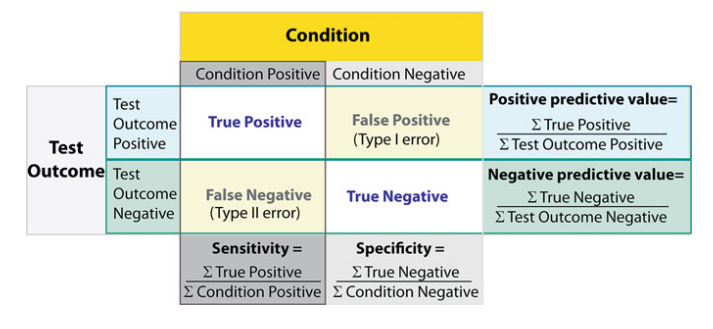

In [23]:
Image(filename='Imagenes/7.8.png')

Suponga que la población de adultos jóvenes austriacos tiene un coeficiente intelectual medio de 105 (es decir, si los hombres austriacos fueran más inteligentes que el resto) y una desviación estándar de 15. 

Ahora queremos verificar si el estudiante promedio en Linz tiene el mismo coeficiente intelectual que el austriaco promedio, y seleccionamos 20 estudiantes. Establecemos el nivel de significación en $\alpha$ = 0.05, es decir, queremos verificar si la media de nuestra muestra se encuentra dentro o fuera del intervalo de confianza del 95 %. 

Supongamos ahora que el estudiante medio de Linz tiene de hecho el mismo coeficiente intelectual que el austríaco medio. Si repetimos nuestro estudio 20 veces, encontraremos en promedio una de esas 20 veces que la media de nuestra muestra es significativamente diferente del coeficiente intelectual promedio de Austria. 

Tal hallazgo sería un resultado falso, a pesar de que nuestra suposición es correcta, y constituiría un error de tipo I.

### b) Errores de tipo II y potencia de prueba

Se indica comúnmente con $\beta$. 

“¿Cuánta probabilidad tenemos de rechazar la hipótesis nula cuando la alternativa es verdadera?”, o en otras palabras, “¿Cuál es la probabilidad de detectar un efecto real?”.

Necesitamos una hipótesis alternativa. 

Son errores en los que el resultado no es significativo, a pesar de que la hipótesis nula es falsa. 

En control de calidad, se denomina riesgo del consumidor, porque el consumidor obtiene un artículo que no cumple con los requisitos reglamentarios. 

Ej: un diagnóstico "saludable" (resultado de prueba "negativo"), aunque el sujeto tenga cáncer. 

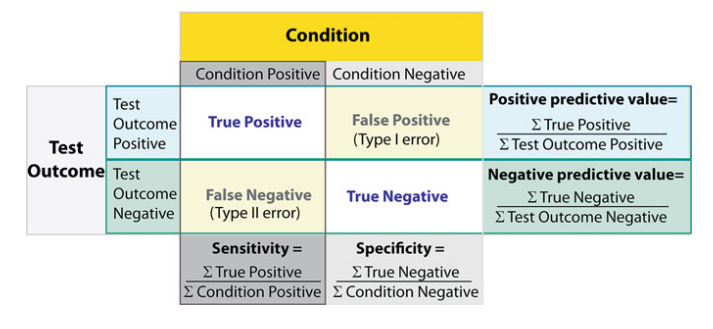

In [24]:
Image(filename='Imagenes/7.8.png')

Potencia de una prueba estadística
- Se define como $(1-\beta)*100$
- Es la probabilidad de aceptar correctamente la hipótesis alternativa. 

Para encontrar el poder de una prueba, necesita una hipótesis alternativa.

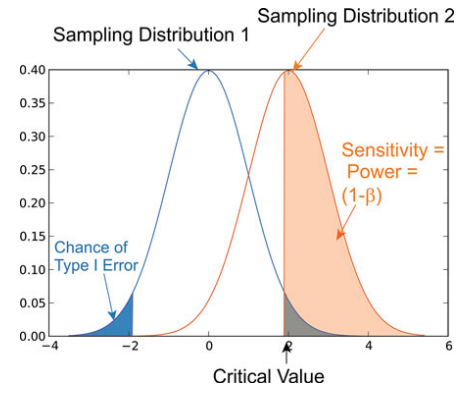

In [25]:
Image(filename='Imagenes/7.5.png')

### c) Errores en la interpretación de los valores P

Los valores P miden la evidencia contra una hipótesis. 

A menudo se los considera incorrectamente como una probabilidad de error por el rechazo de la hipótesis o, peor aún, como la probabilidad posterior (es decir, después de que se hayan recopilado los datos) de que la hipótesis sea verdadera. 

Ej: La hipótesis alternativa es que la media es solo una fracción de una desviación estándar mayor que la media bajo la hipótesis nula.

En ese caso, una muestra que produce un valor p de 0.05 puede tener la misma probabilidad se producirá si la hipótesis alternativa es verdadera como si la hipótesis nula es verdadera!

## 7.2.5 Tamaño de la muestra

Cuanto menor sea el poder de un estudio, menor será la probabilidad de que un efecto "significativo" observado en realidad refleje un efecto real. 

Análisis de potencia

Los análisis retrospectivos de los experimentos publicados han indicado que una gran cantidad de ellos tienen un poder muy bajo, entre el 15% y el 30%. 

Replicamos una prueba con un diseño de prueba con una potencia de alrededor del 25%.

Resultado: 
- El 75% de estas investigaciones habrían pasado por alto un efecto existente.
- Aquellos que encontraron un efecto informaron un tamaño del efecto que es significativamente mayor que el tamaño del efecto real ("maldición del ganador").

In [2]:
from statsmodels.stats import power

Simulamos dos grupos (independientes):

1) un *pre*-grupo, con un coeficiente intelectual promedio de 100
2) un grupo *post*, que ha recibido una poción mágica y ahora tiene un coeficiente intelectual promedio de 105

In [3]:
# Distribuciones de datos
pre = 100
effect_size = 1/3 # El tamaño del efecto es 1/3 de la desviación estándar
std = 15    
n_group = 30

In [4]:
true_effect = effect_size * std
post = pre + true_effect
nd_pre =  stats.norm(pre, std)
nd_post = stats.norm(post, std)

Trazar las curvas teóricas

Muestre la distribución de los datos, así como la distribución de los valores medios esperados (queremos ver si el valor *promedio* ha cambiado).

In [5]:
# Distribuciones de medias
dofs = n_group - 1
sem = std/np.sqrt(n_group)
td_pre = stats.t(dofs, pre, sem)
td_post = stats.t(dofs, post, sem)

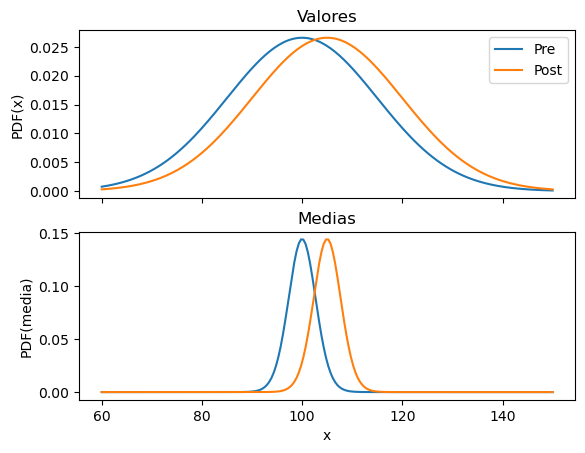

In [6]:
x = np.linspace(60, 150, 200)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, nd_pre.pdf(x), label='Pre')
axs[0].plot(x, nd_post.pdf(x), label='Post')
axs[0].set_title('Valores')
axs[0].set_ylabel('PDF(x)')
axs[0].legend()

axs[1].plot(x, td_pre.pdf(x))
axs[1].plot(x, td_post.pdf(x))
axs[1].set_title('Medias')
axs[1].set_ylabel('PDF(media)')
axs[1].set_xlabel('x')

plt.show()

In [7]:
# Calcular la potencia de la prueba
test_power = power.tt_ind_solve_power(nobs1 = n_group, alpha = 0.05, effect_size = effect_size)
print(f'La potencia de la prueba es {test_power:4.2f}')

La potencia de la prueba es 0.25


Simular 100 pruebas

Ahora bien, si hiciéramos 100 estudios con una potencia del 25%, ¿qué encontraríamos?

In [8]:
n_tests = 100
diffs = []
ps = []
alpha = 0.05 # Umbral comúnmente usado para significación

for test in range(n_tests):
    data_pre = nd_pre.rvs(n_group)
    data_post = nd_post.rvs(n_group)
    t, p = stats.ttest_ind(data_pre, data_post)
    
    diffs.append(np.mean(data_post) - np.mean(data_pre))
    ps.append(p)

In [12]:
ps = np.array(ps)
diffs = np.array(diffs)

significant = ps < alpha
n_significant = np.sum(significant)
print(f'Porcentaje de pruebas significativas: {n_significant/n_tests * 100:2.2f}%\n')

found_diff = np.mean(diffs[significant])
print(f'Diferencia significativa media = {found_diff:4.2f}, en comparación con un efecto real de {true_effect}.')

Porcentaje de pruebas significativas: 29.00%

Diferencia significativa media = 9.46, en comparación con un efecto real de 5.0.


Potencia o sensibilidad de una prueba de hipótesis binaria: es la probabilidad de que la prueba rechace correctamente la hipótesis nula cuando la hipótesis alternativa es verdadera. 

Análisis de potencia: determinación de la potencia de una prueba estadística y el cálculo del tamaño de muestra mínimo requerido para revelar un efecto de una magnitud determinada. Se trata de cuatro factores: 

1. Probabilidad de errores de tipo I ($\alpha$) 
2. Probabilidad de errores de tipo II (potencia de la prueba) ($\beta$)
3. “d de Cohen” ($d$): el tamaño del efecto, es decir, la magnitud del efecto investigado en relación con $\sigma$, la desviación estándar de la muestra.
4. Tamaño de la muestra ($n$) 

Solo se pueden elegir 3 de estos 4 parámetros, el cuarto se fija automáticamente. 

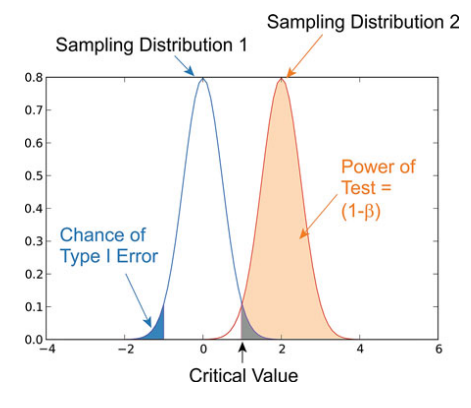

In [14]:
Image(filename = 'Imagenes/7.6.png')

Muestra que la potencia de una prueba aumenta a medida que aumenta el número de muestras. 

Importancia clínica o relevancia clínica: tamaño absoluto de la diferencia D(= d ∗ $\sigma$ ) entre los resultados medios del tratamiento que responderá a una pregunta clínica que se plantea. 

### a) Ejemplos de análisis de potencia

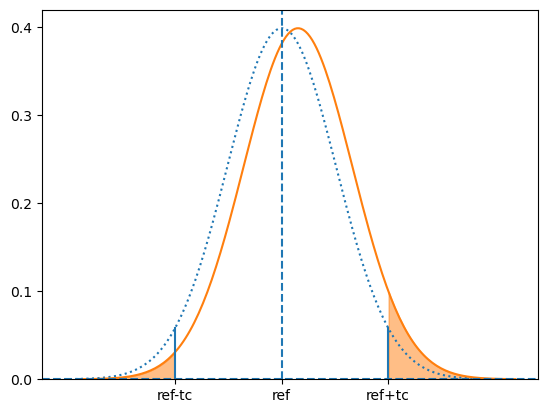

In [16]:
# Trace una distribución normal y marque tc
x = np.linspace(-4, 4, 200)
nd = stats.norm()
y = nd.pdf(x)
plt.plot(x,y, ls='dotted')

# Trace la segunda distribución...
x2 = x + 0.3
plt.plot(x2,y)
plt.axhline(ls='dashed')
plt.axvline(x=0, ymin=0, ymax=1, ls='dashed')

# Incluyendo las áreas de "verdadero positivo"
alpha=0.05
tc = nd.isf(alpha/2)
large = x2>tc
small = x2<-tc
plt.fill_between(x2[large], y[large], color='C1', alpha=0.5)
plt.fill_between(x2[small], y[small], color='C1', alpha=0.5)

# Grafico
plt.plot([tc, tc], [0, nd.pdf(tc)], color='C0')
plt.plot([-tc, -tc], [0, nd.pdf(tc)], color='C0')

xlabels = ['ref-tc', 'ref', 'ref+tc']
xticks = [-tc, 0, tc]
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
ax.set_yticks(np.linspace(0, 0.4, 5))
plt.ylim(0, 0.42)

plt.show()

Usaremos dos soluciones aproximadas, usando la distribución normal para aproximar la distribución t. Los números resultantes subestiman ligeramente los resultados correctos.

Prueba de una media

Si tenemos la hipótesis de que la población de la que extraemos nuestras muestras tiene un valor medio de $x_1$ y una desviación estándar de $\sigma$, y la población real tiene un valor medio de $x_1+D$ y la misma desviación estándar, podemos detectar una diferencia de "dos colas" con un número de muestra mínimo de

$n = \frac{(z_{1-\frac{\alpha}{2}}+ z_{1-\beta})^2}{d^2}$

z es la variable normal estandarizada y se refiere a la PPF de una distribución normal estándar.

$z = \frac{x-\mu}{\sigma}$

y $d = \frac{D}{\sigma}$ el tamaño del efecto, también llamado "d de Cohen". 

Si la media real tiene un valor de $x_1$, queremos detectar esto correctamente en al menos $1 − \alpha\%$ de todas las pruebas; y si la media real se desplaza en D o más, queremos detectar esto con una probabilidad de al menos $1 − \beta\%$.

Prueba entre dos poblaciones diferentes 

Para encontrar una diferencia entre dos medias normalmente distribuidas con desviaciones estándar de $\sigma_1$ y $\sigma_2$, el número mínimo de muestras que necesitamos en cada grupo para detectar una diferencia absoluta D es

$n_1 = n_2 = \frac{(z_{1-\frac{\alpha}{2}}+ z_{1-\beta})^2 (\sigma_1^2+\sigma_2^2)}{D^2}$

### b) Soluciones Python

In [17]:
from statsmodels.stats import power

In [18]:
nobs = power.tt_ind_solve_power(effect_size = 0.5, alpha = 0.05, power = 0.8)
nobs

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


63.76561058785404

In [19]:
np.ceil(nobs)

64.0

In [20]:
# Con pingouin:
nobs = pg.power_ttest(d=0.5, alpha=0.05, power=0.8, n=None)
nobs

63.765610189894716

In [21]:
np.ceil(nobs)

64.0

Interpretación: si comparamos 2 grupos con el mismo número de sujetos y la misma desviación estándar, requerimos $\alpha$ = 0.05 y una potencia de prueba del 80%, y queremos detectar una diferencia entre los grupos que sea la mitad de la desviación estándar, necesita probar 64 sujetos. 

Similarmente,

In [22]:
effect_size = power.tt_ind_solve_power(alpha = .05,
                                      power = .8,
                                      nobs1 = 25)
np.round(effect_size,2)

0.81

Interpretación: si tenemos $\alpha$ = 0.05, un poder de prueba del 80 % y 25 sujetos en cada grupo, entonces la diferencia significativa más pequeña entre los grupos es el 81% de la desviación estándar de la muestra. 

### c) Programas: Tamaño de la muestra

Calcule el tamaño de muestra aproximado para experimentos, para grupos normalmente distribuidos, para: 
- Experimentos con un solo grupo 
- Comparar dos grupos con una hipótesis alternativa "bilateral"

Se usa la distribución normal para aproximar la estadística t, lo que lleva a una pequeña subestimación de los números de muestra requeridos.

In [23]:
# Experimento con un solo grupo

d = 0.5
alpha = 0.05
beta = 0.2
sigma = 1

In [24]:
from scipy.stats import norm

$n = \frac{(z_{1-\frac{\alpha}{2}}+ z_{1-\beta})^2}{d^2}$

$n = \frac{(z_{1-\frac{\alpha}{2}}+ z_{1-\beta})^2 \sigma^2}{D^2}$


In [28]:
n = (norm.ppf(1 - alpha/2) + norm.ppf(1-beta))**2 * sigma**2 / d**2
n = np.ceil(n)
n

32.0

In [30]:
print(f'Para detectar un cambio de {d} en un grupo con SD de {sigma}, ' + 
      f'con significación {alpha} y potencia de prueba {100*(1-beta)}, ' + 
      f'necesita al menos {int(n):d} sujetos.')

Para detectar un cambio de 0.5 en un grupo con SD de 1, con significación 0.05 y potencia de prueba 80.0, necesita al menos 32 sujetos.


In [32]:
# Comparar dos grupos con una hipótesis alternativa "bilateral"
D = 0.4
alpha = 0.05
beta = 0.2
sigma1 = 1
sigma2 = 1

$n_1 = n_2 = \frac{(z_{1-\frac{\alpha}{2}}+ z_{1-\beta})^2 (\sigma_1^2+\sigma_2^2)}{D^2}$

In [33]:
n = (norm.ppf(1-alpha/2) + norm.ppf(1-beta))**2 * (sigma1**2 + sigma2**2) / D**2
n = np.ceil(n)
n

99.0

In [34]:
D = 0.4
alpha = 0.05
beta = 0.2
sigma1 = 0.6
sigma2 = 0.6

In [35]:
n = (norm.ppf(1-alpha/2) + norm.ppf(1-beta))**2 * (sigma1**2 + sigma2**2) / D**2
n = np.ceil(n)
n

36.0

In [36]:
def muestraDosGrupos(D, alpha=0.05, beta=0.2, sigma1=1, sigma2=1):
   

    n = np.ceil((norm.ppf(1-alpha/2.) + \
            norm.ppf(1-beta))**2 * (sigma1**2 + sigma2**2) / D**2)

    print(f'Para detectar un cambio de {D} entre grupos ' +
        f'con una SD de {sigma1} y {sigma2}, ' +
        f'con el nivel de significancia {alpha} y el test de potencia {100*(1-beta)}, ' +
        f'necesitas en cada grupo al menos {int(n):d} sujetos.')

    return n

muestraDosGrupos(0.4, sigma1 = 0.6, sigma2 = 0.6)

Para detectar un cambio de 0.4 entre grupos con una SD de 0.6 y 0.6, con el nivel de significancia 0.05 y el test de potencia 80.0, necesitas en cada grupo al menos 36 sujetos.


36.0

# 7.3 Sensibilidad y especificidad

Sensibilidad
- Es equivalente a la potencia. 
- Proporción de positivos que se identifican correctamente mediante una prueba (= probabilidad de una prueba positiva, dado que el sujeto está enfermo). 

Especificidad
- Proporción de negativos que son correctamente identificados por una prueba (= probabilidad de una prueba negativa, dado que el sujeto está bien). 

Valor predictivo positivo (VPP) 
- Proporción de pacientes con resultados positivos en la prueba que reciben un diagnóstico correcto.

Valor predictivo negativo (VPN) 
- Proporción de pacientes con resultados de prueba negativos que reciben un diagnóstico correcto. 
    
Ej:
- Las pruebas de embarazo tienen una alta sensibilidad:
    - Cuando una mujer está embarazada, la probabilidad de que la prueba sea positiva es muy alta. 
- Un indicador de un ataque con armas atómicas a la Casa Blanca debería tener una especificidad muy alta: 
    - Si no hay ataque, la probabilidad de que el indicador sea positivo debería ser muy pequeña. 

Aunque la sensibilidad y la especificidad caracterizan una prueba y son independientes de la prevalencia, no indican qué parte de los pacientes con resultados anormales en la prueba son realmente anormales. 

Valor predictivo positivo/negativo (VPP/VPN)
- Son los valores relevantes para un médico que diagnostica a un paciente: 
    - Cuando un paciente tiene un resultado positivo en la prueba, ¿cuál es la probabilidad de que el paciente esté realmente enfermo? 
    - Estos valores se ven afectados por la prevalencia de la enfermedad. 

Prevalencia de una enfermedad
- Indica cuántas de cada 100.000 personas están afectadas por ella
- Da el número de nuevos casos diagnosticados por cada 100 000 personas. 

Necesitamos conocer la prevalencia de la enfermedad así como el VPP/VPN de una prueba para brindar una interpretación sensata de los resultados de las pruebas médicas. 

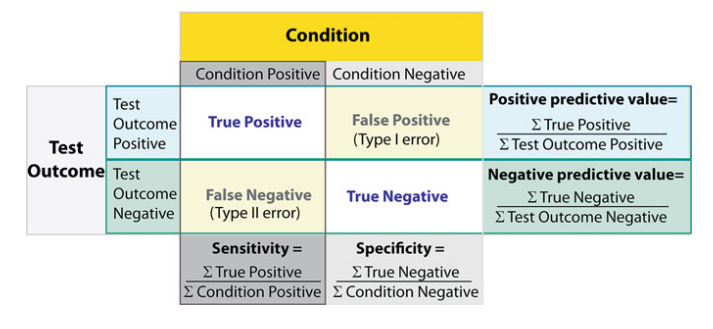

In [2]:
Image(filename = 'Imagenes/7.8.png')

Ej: una prueba en la que un resultado positivo implica un 50% de posibilidades de tener una determinada afección médica (PPV = 50 %). 

Si la mitad de la población tiene esta condición, un resultado positivo de la prueba no le dice nada al médico.

Pero si la condición es muy rara, un resultado positivo de la prueba indica que el paciente tiene una probabilidad del cincuenta por ciento de tener esta condición rara, una información que es muy valiosa. 

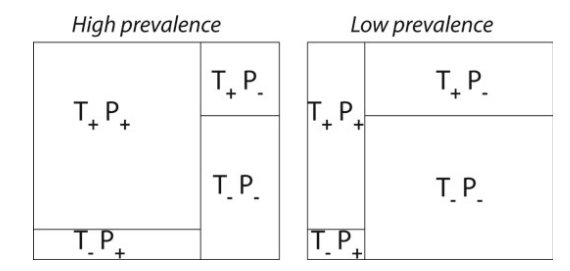

In [3]:
Image(filename = 'Imagenes/7.9.png')

Muestra cómo la prevalencia de una enfermedad afecta la interpretación de los resultados diagnósticos, con una prueba con una especificidad y sensibilidad dadas: 
- Una prevalencia alta de la enfermedad aumenta el VPP de la prueba, pero disminuye el VPN
- Una prevalencia baja de la enfermedad disminuye el VPP de la prueba, pero aumenta el VPN

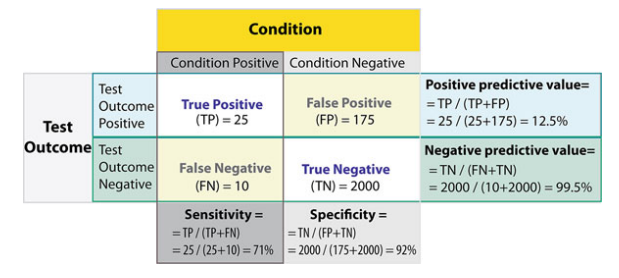

In [4]:
Image(filename = 'Imagenes/7.10.png')

## 7.3.1 Cálculos relacionados

Los resultados de la simulación (IA) se caracterizan por su:
- $exactitud = \frac{TP+TN}{P+N} = \frac{TP+TN}{TP+TN+FP+FN}$
- $recuperación = sensibilidad = potencia$ 
- $precisión = PPV$ 
- $Puntuación~F1 = 2 · \frac{PPV∗sensibilidad}{PPV+sensibilidad}$ = la media armónica de precisión y sensibilidad

Los cocientes de probabilidad se utilizan para evaluar el valor de realizar una prueba diagnóstica. 

Se utiliza la sensibilidad y especificidad de la prueba para determinar si el resultado de una prueba cambia la probabilidad de que exista una condición. 

Versiones de la relación de probabilidad
- Para resultados de prueba positivos
    - Se conoce como razón de verosimilitud positiva (LR+)
    - Le dice cuánto aumenta la probabilidad de tener una enfermedad, dado un resultado positivo en la prueba.
- Para resultados de prueba negativos
    - Se conocen como razón de verosimilitud negativa (LR-)

Relación LR+ = Probabilidad de que una persona con la afección dé positivo (un verdadero positivo) frente a probabilidad de que una persona sin la afección dé positivo (un falso positivo) = (tasa de verdaderos positivos) / (tasa de falsos positivos).

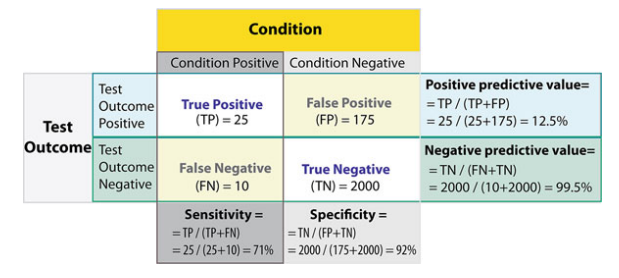

In [5]:
Image(filename = 'Imagenes/7.10.png')

In [6]:
TP = 25
FN = 10
FP = 175
TN = 2000

In [7]:
sensibilidad = TP / (TP + FN)
print(f'La sensibilidad es: {sensibilidad*100}%.\n')

especificidad = TN / (FP + TN)
print(f'La especificidad es: {especificidad*100}%.\n')

VPP = TP / (TP + FP)
print(f'El valor predictivo positivo es: {VPP*100}%.\n')

VPN = TN / (FN + TN)
print(f'El valor predictivo negativo es: {VPN*100}%.')

La sensibilidad es: 71.42857142857143%.

La especificidad es: 91.95402298850574%.

El valor predictivo positivo es: 12.5%.

El valor predictivo negativo es: 99.50248756218906%.


In [22]:
print(f'Tasa de falsos positivos (\u03B1) = Error Tipo I = 1 - especificidad = {(1 - especificidad)*100}%.\n')
print(f'Tasa de falsos negativos (\u03B2) = Error Tipo II = 1 - sensibilidad = {(1 - sensibilidad)*100}%.\n')
print(f'Potencia = sensibilidad {sensibilidad*100}%.\n')
print(f'Razón de verosimilitud positiva = {sensibilidad / (1 - especificidad)}.\n')
print(f'Razón de verosimilitud negativa = {(1 - sensibilidad) / especificidad}.\n')
print(f'Prevalencia = {(TP + FN) / (FP + TN) * 100}%.')

Tasa de falsos positivos (α) = Error Tipo I = 1 - especificidad = 8.045977011494255%.

Tasa de falsos negativos (β) = Error Tipo II = 1 - sensibilidad = 28.57142857142857%.

Potencia = sensibilidad 71.42857142857143%.

Razón de verosimilitud positiva = 8.877551020408163.

Razón de verosimilitud negativa = 0.3107142857142857.

Prevalencia = 1.6091954022988506%.


En sujetos con la afección, la prueba tiene 8.9 veces más probabilidades de producir un resultado positivo que en sujetos sanos.

La prevalencia de la enfermedad es tan baja que tenemos más falsos positivos que verdaderos positivos. 

Un resultado positivo de la prueba es en sí mismo deficiente para confirmar el cáncer (VPP) y se deben realizar más investigaciones.

Identifica correctamente el 71% de todos los cánceres (sensibilidad). 

Como prueba de detección, un resultado negativo es muy bueno para asegurar que un paciente no tiene cáncer (NPV), y esta prueba inicial identifica correctamente al 92 % de los que no tienen cáncer (especificidad).

## 7.3.2 Ejemplo: Mamografía

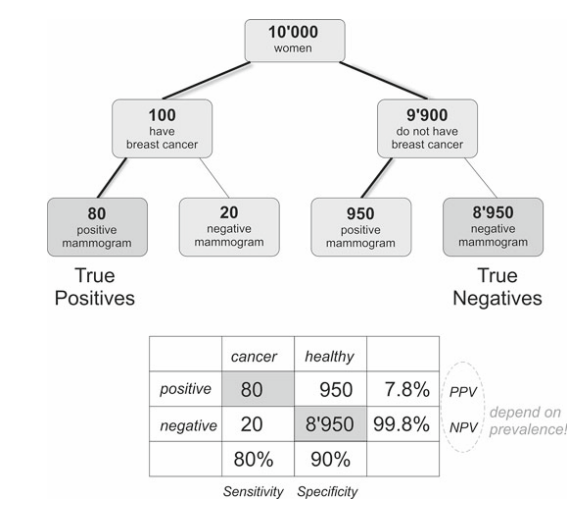

In [23]:
Image(filename = 'Imagenes/7.11.png')

Tienen una sensibilidad de aproximadamente el 80% y una especificidad de aproximadamente el 90%. 

Imagina que vas al médico, te haces una mamografía y el médico te dice: “Lamento informarte que tu mamografía salió positiva”. 

¿Qué se supone que debes pensar? Sin conocer el VPP o la incidencia de cáncer de mama, ¡no puede interpretar el resultado! Pero con información adicional sobre la incidencia del cáncer de mama (que es, por ejemplo, aproximadamente el 1% para mujeres de 50 años), podemos calcular el VPP, que le indica cuántas de todas las pruebas positivas son positivas verdaderas: el PPV es 7.8%. 

Entonces ¡hazte una segunda prueba!

In [24]:
VP = 80
FN = 20
FP = 950
VN = 8950

In [30]:
sensibilidad = VP / (VP + FN)
print(f'Sensibilidad: {sensibilidad*100}%.\n')

especificidad = VN / (FP + VN)
print(f'Sensibilidad: {especificidad*100}%.\n')

VPP = VP / (VP + FP)
print(f'El valor predictivo positivo es: {VPP*100}%.\n')

VPP = VN / (FN + VN)
print(f'El valor predictivo negativo es: {VPP*100}%.')

Sensibilidad: 80.0%.

Sensibilidad: 90.40404040404042%.

El valor predictivo positivo es: 7.766990291262135%.

El valor predictivo negativo es: 99.77703455964325%.


# 7.4 Curva característica de funcionamiento del receptor (ROC)

Estrechamente relacionada con la sensibilidad y la especificidad.

Proporciona un procedimiento claro sobre cómo determinar el umbral óptimo para los parámetros que dividen 2 poblaciones.

Ej: sujetos sanos y pacientes. 

La curva ROC es un gráfico que muestra la relación entre la tasa de verdaderos positivos (en el eje vertical) y la tasa de falsos positivos (en el eje horizontal). 

El único parámetro que podemos cambiar es el valor de corte. 

¿Existe una opción óptima para este valor de corte? 

Sí, es el punto de la curva ROC con la mayor distancia a la diagonal.

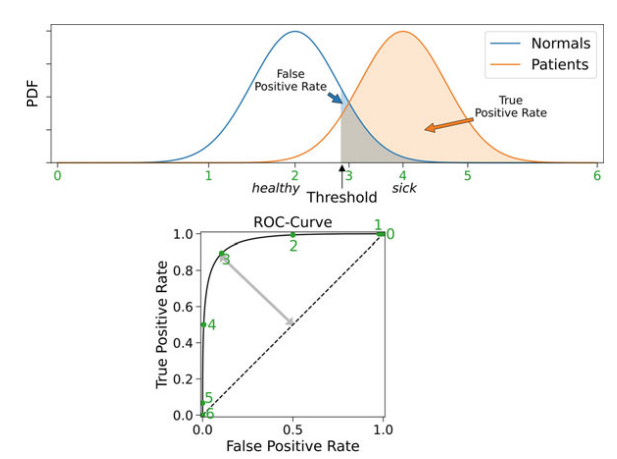

In [31]:
Image(filename = 'Imagenes/7.12.png')

C:\Users\usuario\AppData\Local\Temp\ipykernel_3080\1850721080.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


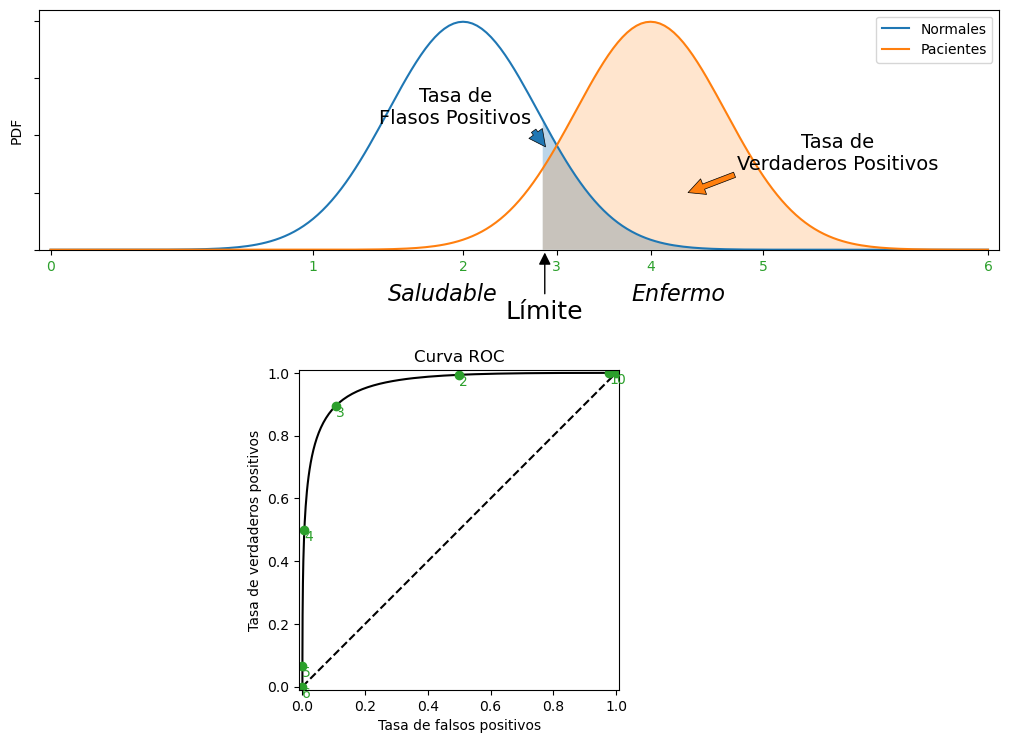

In [34]:
# Calcular las curvas PDF
x = np.linspace(-10, 15, 201)
normals = stats.norm(1,2)
patients = stats.norm(6,2)
y1 = normals.pdf(x)
y2 = patients.pdf(x)

xtick_locations = [-10, -3, 1, 3.5, 6, 9, 15]
xtick_labels = ['0', '1', '2', '3', '4', '5', '6']

# Ubicaciones de ejes
ROC = {'left': 0.35,
        'width': 0.36,
        'bottom': 0.1,
        'height': 0.47}

PDF = {'left': 0.1,
        'width': 0.8,
        'bottom': 0.65,
        'height': 0.3}

ROC = {'left': 0.30,
        'width': 0.30,
        'bottom': 0.1,
        'height': 0.4}

PDF = {'left': 0.1,
        'width': 0.8,
        'bottom': 0.65,
        'height': 0.3}

rect_ROC = [ROC['left'], ROC['bottom'], ROC['width'], ROC['height']]
rect_PDF = [PDF['left'], PDF['bottom'], PDF['width'], PDF['height']]

fig = plt.figure(figsize=(12,8))
#setFonts(18)

ax1 = plt.axes(rect_PDF)
ax2 = plt.axes(rect_ROC)

# Trazar y etiquetar las curvas PDF
ax1.plot(x,y1, label='Normales')
ax1.fill_between(x,0,y1, where=x>3, facecolor='C0', alpha=0.3)
ax1.annotate('Tasa de\nFlasos Positivos',
            xy=(3.2, 0.09),
            xytext=(0.8, 0.11),
            fontsize=14,
            horizontalalignment='center',
            arrowprops=dict(facecolor='C0',
            lw=0.5))

ax1.plot(x,y2, label='Pacientes')
ax1.fill_between(x,0,y2, where=x>3, facecolor='C1', alpha=0.2)

ax1.set_xticks(xtick_locations)
ax1.set_xticklabels(xtick_labels, color='C2')
ax1.set_xlim(-10.3, 15.3)

ax1.annotate('Tasa de\nVerdaderos Positivos',
            xy=(7, 0.05),
            xytext=(11,0.07),
            fontsize=14,
            horizontalalignment='center',
            arrowprops=dict(facecolor='C1',
                lw=0.5))

ax1.annotate('Límite',
            xy=(3.18, 0.00),
            xytext=(3.18,-0.06),
            fontsize=18,
            horizontalalignment='center',
            arrowprops=dict(facecolor='k',
                arrowstyle='-|>'))

ax1.text(5.5, -0.045, 'Enfermo', fontsize=16, style='italic')
ax1.text(-1, -0.045, 'Saludable', fontsize=16, style='italic')

ax1.set_ylabel('PDF')
ax1.set_ylabel('PDF')
ax1.set_ylim([0, 0.21])
ax1.legend()
ax1.set_yticklabels([])
plt.tight_layout()

# Plot the ROC-curve
ax2.plot(normals.sf(x), patients.sf(x), 'k')
ax2.plot(np.array([0,1]), np.array([0,1]), 'k--')

x_values = normals.sf(xtick_locations)
y_values = patients.sf(xtick_locations)

ax2.plot(x_values, y_values, marker='o', color='C2', lw=0)

for x,y,label in zip(x_values, y_values, xtick_labels):
    ax2.annotate(label, xy=(x,y), textcoords='data',
                horizontalalignment='left',
                verticalalignment='top',
                color='C2')

# Curva ROC
ax2.set_title('Curva ROC')
ax2.axis('square')
ax2.set_xlim([-0.01, 1.01])
ax2.set_ylim([-0.01, 1.01])
ax2.set_xlabel('Tasa de falsos positivos')
ax2.set_ylabel('Tasa de verdaderos positivos')

#arrow_bidir(ax2, (0.5,0.5), (0.095, 0.885))

plt.show()

# 7.5 Ejercicios

1. Sensibilidad y especificidad Se compara una nueva prueba con el “estándar de oro”. Los resultados son 
- Verdadero positivo: 10 
- Falso positivo: 2 
- Falso negativo: 3 
- Verdadero negativo: 8 

* Calcule la sensibilidad, la especificidad, el valor predictivo positivo y el valor predictivo negativo. 

* ¿Cuáles de estos se ven afectados por la prevalencia de la enfermedad?

In [2]:
VP = 10
FP = 2
FN = 3
VN = 8

In [4]:
sensibilidad = VP / (VP + FN)
print(f'La sensibilidad es: {sensibilidad:.2f}.\n')

especificidad = VN / (FP + VN)
print(f'La especificidad es: {especificidad:.2f}.\n')

VPP = VP / (VP + FP)
print(f'El Valor Predictivo Positivo es: {VPP:.2f}.\n')

VPN = VN / (VN + FN)
print(f'El Valor Predictivo Negativo es: {VPN:.2f}.')

La sensibilidad es: 0.77.

La especificidad es: 0.80.

El Valor Predictivo Positivo es: 0.83.

El Valor Predictivo Negativo es: 0.73.


La sensibilidad y la especificidad no se ven afectadas por la prevalencia de la enfermedad, ya que solo dependen de los resultados de la prueba y del estándar de oro. Estos indicadores están relacionados con la capacidad de la prueba para identificar verdaderos positivos y verdaderos negativos, independientemente de la prevalencia de la enfermedad en la población.

Sin embargo, el VPP y el VPN sí se ven afectados por la prevalencia de la enfermedad en la población. Cuando la prevalencia de la enfermedad es alta, el VPP tiende a ser más alto, lo que significa que hay una mayor probabilidad de que una persona con resultado positivo en la prueba realmente tenga la enfermedad. Por otro lado, el VPN tiende a ser más alto cuando la prevalencia de la enfermedad es baja, lo que significa que hay una mayor probabilidad de que una persona con resultado negativo en la prueba realmente no tenga la enfermedad. Esto se debe a la forma en que se calculan estos valores predictivos y cómo están relacionados con las tasas de verdaderos positivos y verdaderos negativos en relación con la prevalencia de la enfermedad en la población.

2. Curvas ROC (CONSULTAR BBDD)

En un esfuerzo por automatizar la detección de problemas de espalda, diferentes sujetos ejecutaron un ejercicio llamado "reverencia del camarero". La ejecución de este movimiento se registró con un sensor de movimiento y un fisiólogo experimentado calificó cada movimiento como saludable, patológico o incierto. Los resultados se almacenaron en el archivo Trunk_flexion.xlsx. 
- Lea los datos. 
- Elimine todos los datos con comentarios y datos en los que el fisioterapeuta estaba “inseguro”. 
- Calcular y mostrar la sensibilidad, la especificidad, el VPP y el VPN de los datos, si los valores calculados por debajo de un umbral = 9 indican un sujeto sano. 
- Para los mismos datos, trace la curva ROC y calcule el mejor umbral de discriminación.

3. Precisión y recuperación (CONSULTAR)

Se le proporciona un programa de clasificación para números escritos a mano, que para cada clasificación también proporciona un "nivel de confianza". 

Ahora debe decidir en qué nivel de confianza desea utilizar el programa. 

Para niveles de confianza seleccionados entre 0 y 12, los siguientes números que indican [8, 7, 3, 9, 5, 2, 5, 5, 6, 5, 5, 5] se clasifican como "5":

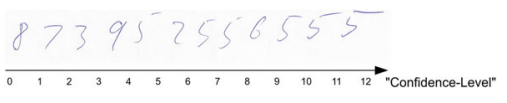

In [5]:
Image(filename = 'Imagenes/7.13.png')

Entonces, por ejemplo, para un nivel de confianza de "10", los dos últimos números se identifican correctamente como "5", pero se pierden los 5-s con un nivel de confianza más bajo. 

- Trazar la recuperación/sensibilidad/potencia y la precisión/PPV en función del nivel de confianza. 

- ¿Cuáles son los valores de recuperación y precisión para un nivel de confianza de "7"?